# Projet 1 - Classification 

* **Authors:** Mouna Dhaouadi / Kacem Khaled
* **Class:** IFT6285
* **Term:** Fall 2021
* **Professor** Dr. Philippe Langlais

### Connecting to drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/IFT6285")
!ls

'Copy of text-transformers.ipynb'   Models
 Data				    Outputs
 dataframes.ipynb		   'Projet1-Classification - task1.ipynb'
'devoir1 (1).ipynb'		   'Projet1-Classification - task2.ipynb'
 devoir1.ipynb			    TP2.ipynb
 Links.gdoc


## Task 1 : COLA

### Step1 : Download and get to know the data 

In [3]:
import pandas as pd
from statistics import mean

In [4]:
COLA_data_folder = 'Data/CoLA/'
COLA_models_folder  = 'Models/CoLA/'
COLA_output_folder = 'Outputs/CoLA/'

train_cola_file = COLA_data_folder +'train.tsv'
dev_cola_file =COLA_data_folder + 'dev.tsv'
test_cola_file =COLA_data_folder  + 'test.tsv'

In [5]:
train_cola_data =  pd.read_table(train_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
train_cola_data

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8546,0,Poseidon appears to own a dragon
8547,0,Digitize is my happiest memory
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [11]:
train_cola_data['Acceptability judgment label'].value_counts()

1    6023
0    2528
Name: Acceptability judgment label, dtype: int64

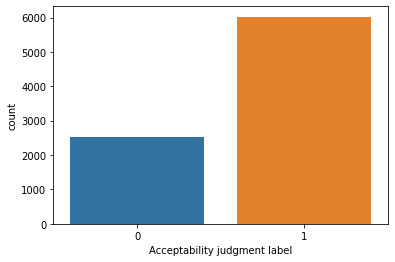

In [12]:
from seaborn import countplot
countplot(x='Acceptability judgment label', data = train_cola_data)

In [9]:
train_cola_data_wrong = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([0])]
train_cola_data_wrong

,Acceptability judgment label,Sentence
18,0,They drank the pub.
20,0,The professor talked us.
22,0,We yelled ourselves.
23,0,We yelled Harry hoarse.
25,0,Harry coughed himself.
...,...,...
8531,0,Anson believed to be happy.
8539,0,Anson left before Jenny saw himself.
8545,0,Anson thought that himself was going to the club.
8546,0,Poseidon appears to own a dragon


In [10]:
train_cola_data_right = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([1])]
train_cola_data_right

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8543,1,Gilgamesh perhaps should be leaving.
8544,1,Gilgamesh hasn't kissed Ishtar.
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [11]:
cola_sentences_list =  [sent for sent in train_cola_data["Sentence"]]
cola_max_len = len ( max(cola_sentences_list, key=len) ) 
cola_min_len = len ( min(cola_sentences_list, key=len) )
cola_avg_len = mean ( [ len(sent) for sent in cola_sentences_list ]  )
cola_max_len, cola_min_len, cola_avg_len

(231, 6, 40.700736755934976)

In [12]:
cola_wrong_sentences_list =  [sent for sent in train_cola_data_wrong["Sentence"]]
cola_wrong_max_len = len ( max(cola_wrong_sentences_list, key=len) ) 
cola_wrong_min_len = len ( min(cola_wrong_sentences_list, key=len) )
cola_wrong_avg_len = mean ( [ len(sent) for sent in cola_wrong_sentences_list ]  )
cola_wrong_max_len, cola_wrong_min_len, cola_wrong_avg_len

(151, 6, 40.71558544303797)

In [13]:
cola_right_sentences_list =  [sent for sent in train_cola_data_right["Sentence"]]
cola_right_max_len = len ( max(cola_right_sentences_list, key=len) ) 
cola_right_min_len = len ( min(cola_right_sentences_list, key=len) )
cola_right_avg_len = mean ( [ len(sent) for sent in cola_right_sentences_list ]  )
cola_right_max_len, cola_right_min_len, cola_right_avg_len

(231, 6, 40.69450439980076)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


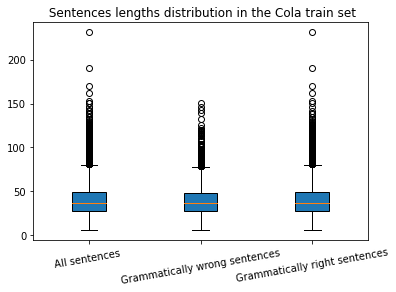

In [17]:
import matplotlib.pyplot as plt

data_for_boxplots = [ [ len(sent) for sent in cola_sentences_list ], [ len(sent) for sent in cola_wrong_sentences_list ], [ len(sent) for sent in cola_right_sentences_list ]]
fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.set_title(' Sentences lengths distribution in the Cola train set')
ax_boxplot.boxplot(data_for_boxplots, patch_artist = True)
plt.xticks([1, 2, 3], ["All sentences ", "Grammatically wrong sentences", "Grammatically right sentences"], rotation=10)
plt.show()

In [6]:
#todo: do the same for the dev set + put the statitisic in tables like slide 4 of sklearn PDF in the report  + put in the report 
dev_cola_data =  pd.read_table(dev_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
dev_cola_data

,Acceptability judgment label,Sentence
0,1,The sailors rode the breeze clear of the rocks.
1,1,The weights made the rope stretch over the pul...
2,1,The mechanical doll wriggled itself loose.
3,1,"If you had eaten more, you would want less."
4,0,"As you eat the most, you want the least."
...,...,...
1038,1,John considers Bill silly.
1039,1,John considers Bill to be silly.
1040,0,John bought a dog for himself to play with.
1041,1,John arranged for himself to get the prize.


### Step 2 : Use a reasonable baseline and evaluate it 

In [60]:
from sklearn.dummy import DummyClassifier
from joblib import dump, load
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, average_precision_score, f1_score

#### Dummy Classifier to start with

In [45]:
# Dummy classifier  train 
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(train_cola_data['Sentence'], train_cola_data['Acceptability judgment label'])

#save model 
dump(dummy_classifier, COLA_models_folder+'dummy-most.clf')

# load model 
clf_dummy = load(COLA_models_folder+'dummy-most.clf')

# predict with the model
y_dummy = clf_dummy.predict(dev_cola_data['Sentence']) # predictions

# output and save  the prediction
out = COLA_output_folder+"dummy_model.out"
pickle.dump([clf_dummy.classes_, y_dummy], open(out, 'wb'))

#open and read picle file to get predictions 
[ clf_dummy.classes_,y_dummy1 ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.69      1.00      0.82       721

    accuracy                           0.69      1043
   macro avg       0.35      0.50      0.41      1043
weighted avg       0.48      0.69      0.57      1043



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Reseanable baseline : Logistic Regression with TF-IDF vectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [63]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression()
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# dump the vectorizer and the model (for use at test time)
dump(vectorizer, COLA_models_folder + 'tf-idf_vectorizer.vec')
dump(LogisticRegression_classifier, COLA_models_folder + 'LogisticRegression_classifier.clf') 

# load model + vec
vectorizer = load(COLA_models_folder + 'tf-idf_vectorizer.vec')
LogisticRegression_classifier = load(COLA_models_folder+'LogisticRegression_classifier.clf')

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifier

# output and save  the prediction
out = COLA_output_folder+"LogisticRegression_model.out"
pickle.dump([LogisticRegression_classifier.classes_, y_LR], open(out, 'wb'))

#open and read pickle file to get predictions 
[ LogisticRegression_classifier.classes_,y_LR ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR))
print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], y_LR))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10       322
           1       0.70      0.97      0.81       721

    accuracy                           0.69      1043
   macro avg       0.56      0.51      0.46      1043
weighted avg       0.61      0.69      0.59      1043

accuracy score 0.6855225311601151
average precision score 0.6965087102573256
f1 score 0.8093023255813954


In [64]:
baseline_vectorizer = vectorizer
baseline_classifier = LogisticRegression_classifier

baseline_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR)
baseline_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_LR)

print(baseline_accuracy, baseline_f1_score)

0.6855225311601151 0.8093023255813954


#### Evaluation

In [ ]:
different scoring metrics :  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

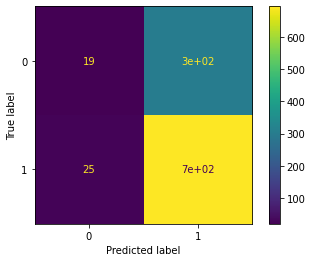

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(dev_cola_data['Acceptability judgment label'], y_LR, labels=baseline_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=baseline_classifier.classes_)
disp.plot()

### Step3 : Trying to improve the baselines with various curious ways

 #### investigated the use of Cross Validation (training) --> it did not work , maybe remove this part later, I think it is irelevant. the performance on the test set did not change

In [33]:
from sklearn.model_selection import cross_val_score

scoring = [ 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
accuracies = []
f1_scores = []

for score in scoring:
  #cross validation on the train set 
  scores = cross_val_score(baseline_classifier, X_train, train_cola_data['Acceptability judgment label'], scoring=score, cv=20)
  print (scores)
  # report performance
  print('Accuracy: %.3f' % mean(scores))

  #on the test set now --> nothing changed
  y_LR_CV = baseline_classifier.predict(X_test) # run the classifier
  print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], y_LR_CV) )
  print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('##########')

  #compare to the baseline
  LR_CV_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_CV)
  accuracies.append(LR_CV_accuracy)
  LR_CV_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_LR_CV)
  f1_scores.append(LR_CV_f1_score)

for index, score in enumerate(scoring):
  # print(accuracies[index], baseline_accuracy, )
  print("Improvement of %f in accuracy compared to the baseline using scoring fuction = %s" % (  (100 * (accuracies[index] - baseline_accuracy) / baseline_accuracy) , score ) )
  print('Improvement of %f in f1_score compared to the baseline using scoring fuction = %s' % ( (100 * (f1_scores[index] - baseline_f1_score) / baseline_f1_score), score ) )

[0.70327103 0.64719626 0.64953271 0.5911215  0.66588785 0.64719626
 0.62383178 0.6588785  0.6682243  0.62616822 0.66588785 0.6440281
 0.54332553 0.6440281  0.59953162 0.68149883 0.67915691 0.68384075
 0.68852459 0.70257611]
Accuracy: 0.651
              precision    recall  f1-score   support

           0       0.43      0.06      0.10       322
           1       0.70      0.97      0.81       721

    accuracy                           0.69      1043
   macro avg       0.56      0.51      0.46      1043
weighted avg       0.61      0.69      0.59      1043

accuracy score 0.6855225311601151
average precision score 0.6965087102573256
f1 score 0.8093023255813954
##########
[0.5766375  0.34367246 0.4084596  0.34333333 0.43110561 0.40719697
 0.40684043 0.36901837 0.34624697 0.37907851 0.41547246 0.34289277
 0.33148046 0.34289277 0.356387   0.42130751 0.38749535 0.48329463
 0.51083591 0.51926101]
Accuracy: 0.406
              precision    recall  f1-score   support

           0       0.

#### Investigate the use of Grid search for LR classifier --> very minor improvement in accuracy and f1 score

In [36]:
## using the gridSearch - for LR classifier , not the vectorizer, on the Train Set !!! 

from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None

param_grid = dict(C=C_values, class_weight=class_weights , solver = solvers )
print(param_grid)

grid = GridSearchCV(baseline_classifier, param_grid, cv=10, scoring='accuracy')
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
grid.fit(X_train, train_cola_data['Acceptability judgment label'])

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR_best = grid.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_best))


  #compare to the baseline
LR_best_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_best)
LR_best_score = f1_score(dev_cola_data['Acceptability judgment label'],y_LR_best)

print(LR_best_accuracy, LR_best_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (LR_best_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (LR_best_score - baseline_f1_score) / baseline_f1_score))


{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
0.6869369295512925
{'C': 0.5, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       322
           1       0.69      0.99      0.81       721

    accuracy                           0.69      1043
   macro avg       0.51      0.50      0.42      1043
weighted avg       0.58      0.69      0.57      1043

0.6874400767018217 0.8139269406392693 0.6855225311601151 0.8093023255813954
Improvement of 0.28% in accuracy compared to the baseline.
Improvement of 0.57% in f1_score compared to the baseline.


#### Impact of changing hyper-parmeters of the baseline - minor improvement in accuracy and f1 score




In [ ]:
def train_save_predict(vectorizer, classifer, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name):
    
    X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
    classifer.fit(X_train, train_cola_data['Acceptability judgment label'])

    # dump the vectorizer and the model (for use at test time)
    dump(vectorizer, COLA_models_folder + vectorizer_name )
    dump(classifier, COLA_models_folder + classifier_name) 

    # load model + vec
    tf_idf_vectorizer = load(COLA_models_folder + vectorizer_name)
    LR_classifier = load(COLA_models_folder+classifier_name)

    # predict with the model
    X_test = tf_idf_vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
    y_LR = LR_classifier.predict(X_test) # run the classifier

    # output and save  the prediction
    out = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
    pickle.dump([LR_classifier.classes_, y_LR], open(out, 'wb'))



###### Step 1 :  try different meta-parameters and save them in different files.


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          print(max_df, min_df)
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                  # a number of options can control a vectorizer, I reckon you investigate them
                  vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_df,
                                              max_df=max_df,
                                              ngram_range=ngram_range)
                  
                  vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                  vectorizer_name = 'tf-idf_vectorizer'+vec_meta_parameters_name+'.vec'

                  classifier = LogisticRegression(C=c,class_weight=class_weight, solver=solver)
                  clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)

                  classifier_name = 'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+'.clf'
                  print(classifier_name)
                  try:
                    train_save_predict(vectorizer, classifier, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name )
                  except ValueError as err:
                    print(err)



In [46]:
###### Step 2: get the output files saved and calculate the evaluation metrics of all of them


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


accuracy_scores = []
f1_scores = []

vect_parameters = []
clsf_parameters = []

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                   vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                   clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)
                   filename = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
                   if os.path.isfile(filename): #is file exists
                      #open and read picle file to get predictions 
                      [ _ , y_LR_t ] = pickle.load( open(filename, 'rb'))

                      #compare and evaluate the predictions
                      #print(filename)
                      #print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

                      vect_params={'analyzer':analyzer, 'ngram_range': ngram_range, 'min_df':min_df, 'max_df':max_df}
                      clsf_params={'solver':solver, 'C':c, 'class_weight':class_weight}

                      accuracy_scores.append( accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_t)  )
                      f1_scores.append( f1_score(dev_cola_data['Acceptability judgment label'],y_LR_t) )

                      vect_parameters.append(vect_params)
                      clsf_parameters.append(clsf_params)


print(accuracy_scores)
print(f1_scores)
print(baseline_accuracy, baseline_f1_score)

d =  {'vectorizer parameters': vect_parameters, 'classifier parameters': clsf_parameters, 'accuracy score': accuracy_scores, 'f1 score' : f1_scores}
df = pd.DataFrame(data=d)
df.sort_values('accuracy score', ascending=False)

[0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816,

,vectorizer parameters,classifier parameters,accuracy score,f1 score
1087,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.691275,0.817460
533,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 1.5, 'class_weight': None}",0.691275,0.817460
1049,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 1.5, 'class_weight': N...",0.691275,0.817460
525,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1, 'class_weight'...",0.691275,0.817460
527,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.691275,0.817460
...,...,...,...,...
1482,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.509108,0.594295
1488,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.509108,0.594295
1476,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.509108,0.594295
1494,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.509108,0.594295


In [56]:
best_accuracy_score=df.sort_values('accuracy score', ascending=False)['accuracy score'].iloc[0]

print('Best Improvement = {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (best_accuracy_score - baseline_accuracy) / baseline_accuracy))

Best Improvement of 0.84% in accuracy compared to the baseline.


In [57]:
df.sort_values('f1 score', ascending=False)

,vectorizer parameters,classifier parameters,accuracy score,f1 score
1061,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'lbfgs', 'C': 1.5, 'class_weight': ...",0.691275,0.817460
1019,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 1.5, 'class_weight': N...",0.691275,0.817460
1021,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'newton-cg', 'C': 0.5, 'class_weigh...",0.691275,0.817460
347,"{'analyzer': 'word', 'ngram_range': (1, 2), 'm...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.691275,0.817460
1023,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'newton-cg', 'C': 1, 'class_weight'...",0.691275,0.817460
...,...,...,...,...
588,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.525407,0.590571
594,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.525407,0.590571
592,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 1.5, 'class_weight': 'b...",0.525407,0.590571
576,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.525407,0.590571


In [61]:
best_f1_score=df.sort_values('f1 score', ascending=False)['f1 score'].iloc[0]

print('Best Improvement = {:0.2f}% in f1 score compared to the baseline.'.format( 100 * (best_f1_score - baseline_f1_score) / baseline_f1_score))

Best Improvement = 1.01% in f1 score compared to the baseline.


In [60]:
#maybe to investigate results more

#### Impact of  pre-processing techniques (todo)

In [ ]:
we do not consider removing stop words -> makes them wrong 

#### Performace of other feature- models  - Random Forest + TF-IDF VECTORIZER ---> made accuracy + f1 score worst / then using Grid search, minor imporvement

In [64]:
# https://www.kaggle.com/onadegibert/sentiment-analysis-with-tfidf-and-random-forest
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

tfidf_vect = TfidfVectorizer()
tfidf_vect_fit=tfidf_vect.fit(train_cola_data['Sentence'])
X_train=vectorize(train_cola_data['Sentence'],tfidf_vect_fit)

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, train_cola_data['Acceptability judgment label'])

X_test=vectorize(dev_cola_data['Sentence'],tfidf_vect_fit)
y_RF = clf_RF.predict(X_test) # run the classifier
print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF))


              precision    recall  f1-score   support

           0       0.43      0.15      0.22       322
           1       0.71      0.91      0.80       721

    accuracy                           0.68      1043
   macro avg       0.57      0.53      0.51      1043
weighted avg       0.62      0.68      0.62      1043



In [ ]:
#todo: save the RF model and the ouputs 

In [66]:
#compare to the baseline
RF_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_RF)
RF_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_RF)

print(baseline_accuracy, baseline_f1_score)
print(RF_accuracy,RF_f1_score )

print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (RF_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (RF_f1_score - baseline_f1_score) / baseline_f1_score))

0.6855225311601151 0.8093023255813954
0.675934803451582 0.7951515151515153
Improvement of -1.40% in accuracy compared to the baseline.
Improvement of -1.75% in f1_score compared to the baseline.


In [69]:
# improve Random Forest using Grid search
from sklearn.model_selection import RandomizedSearchCV

max_depths = [80, 90, 100, 110]
max_features = [2,3]
min_samples_leafs= [3, 4, 5]
min_samples_splits =  [8, 10, 12]
n_estimators = [100, 200, 300, 1000]
bootstrap = [True]

param_dist = dict(n_estimators=n_estimators, bootstrap=bootstrap, max_depth=max_depths, max_features=max_features, min_samples_leaf = min_samples_leafs , min_samples_split = min_samples_splits )
print(param_grid)

rand = RandomizedSearchCV(clf_RF, param_dist, cv=10, n_iter=10, random_state=5)
rand.fit(X_train, train_cola_data['Acceptability judgment label'])
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


,mean_test_score,std_test_score,params
0,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 8, ..."
1,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
2,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 10,..."
3,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 8, ..."
4,0.704362,0.000462,"{'n_estimators': 200, 'min_samples_split': 8, ..."
5,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 12,..."
6,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
7,0.704362,0.000462,"{'n_estimators': 1000, 'min_samples_split': 12..."
8,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
9,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 8, ..."


In [71]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

# predict with the best parameteres 
y_RF_best = rand.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF_best))

RF_best_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_RF_best)
RF_best_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_RF_best)

#compare to the baseline
print(RF_best_accuracy, RF_best_f1_score)
print(baseline_accuracy, baseline_f1_score)

print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (RF_best_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (RF_best_f1_score - baseline_f1_score) / baseline_f1_score))

0.7043620538886156
{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 80, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.69      1.00      0.82       721

    accuracy                           0.69      1043
   macro avg       0.35      0.50      0.41      1043
weighted avg       0.48      0.69      0.57      1043

0.6912751677852349 0.8174603174603174
0.6855225311601151 0.8093023255813954
Improvement of 0.84% in accuracy compared to the baseline.
Improvement of 1.01% in f1_score compared to the baseline.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#todo: save the best RF-model 

#### Performance of deep-learning models using transfer learning: fine tunining LSTM ( PRE - Trained on WikiText103 ) 

In [15]:
!pip install fastai --upgrade 
#!pip install fastai2
# !pip uninstall fastai2

     |████████████████████████████████| 189 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [8]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [9]:
from fastai.text.all import *

files = get_files(COLA_data_folder, recurse=False, extensions='.tsv')
print(files)

dls = TextDataLoaders.from_df(train_cola_data, text_col='Sentence', label_col='Acceptability judgment label', valid_pct=0.1)  ## Random 10% as validation

dls.show_batch(max_n=3) # tokenized text

[Path('Data/CoLA/dev.tsv'), Path('Data/CoLA/train.tsv'), Path('Data/CoLA/test.tsv')]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj everybody who has ever , worked in any office which contained any xxunk which had ever been used to type any letters which had to be signed by any xxunk who ever worked in any department like mine will know what i xxunk .",1
1,"xxbos xxmaj handsome though everyone xxunk me to try to force xxmaj bill to make xxmaj xxunk agree that xxmaj dick is , xxmaj i 'm still going to xxmaj marry xxmaj herman .",1
2,"xxbos xxmaj one of the xxmaj xxunk children is a xxunk girl , who gave a black eye to the xxunk with the xxmaj german xxunk before the start of the war .",1


In [10]:
len(dls.train_ds), len(dls.valid_ds)

(7696, 855)

In [12]:
# load a pretrained model
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, perplexity] ) # https://docs.fast.ai/text.models.awdlstm.html
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(2624, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(2624, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)


In [13]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 
learn.show_results() # on the training 

('0', tensor(0), tensor([0.5283, 0.4717]))


('0', tensor(0), tensor([0.5135, 0.4865]))


('1', tensor(1), tensor([0.4987, 0.5013]))


('1', tensor(1), tensor([0.4956, 0.5044]))


('0', tensor(0), tensor([0.5029, 0.4971]))


,text,category,category_
0,xxbos a xxunk xxunk of potatoes with xxunk xxunk fell on the professor of linguistics with the terrible taste in xxmaj xxunk - shirts from the twelfth story .,1,0
1,xxbos xxmaj the xxunk who had known that the train was not on fire said that those who had thought so had xxunk themselves in the xxunk .,1,0
2,"xxbos xxmaj the folks up at corporate headquarters are the sort of people who the sooner you solve this problem , the more easily you 'll satisfy .",1,0
3,xxbos xxmaj the hardest that i think i remember him ever telling me that he had heard of it xxunk around here was last xxmaj january 12th .,1,0
4,"xxbos xxmaj we had hoped to get three new xxunk every xxunk , but we only had enough money to get an equipment every two xxunk .",0,0
5,xxbos xxmaj we have many graduate students but this year the graduate director met with any student in the graduate xxunk xxunk to discuss their progress .,0,0
6,"xxbos xxmaj xxunk xxunk wants , though she does n't really expect , the xxmaj miami xxmaj xxunk to be in the play - xxunk .",1,0
7,"xxbos xxmaj the dumplings which xxmaj sasha is gobbling down faster than i can reheat them are extremely tasty , if i do say so .",1,0
8,"xxbos xxmaj if xxmaj ron knows whether to wear a tuxedo , and xxmaj caspar knows whether not to , do they know different things ?",1,0


In [14]:
# then fine-tune it
learn.fine_tune(4, 1e-2)   # 4 epochs
# the accuracy shown is on the validation set

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.667409,0.610547,0.702924,1.841439,01:35


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.600929,0.602877,0.694737,1.827368,04:22
1,0.584589,0.584077,0.728655,1.793335,04:22
2,0.530635,0.563238,0.740351,1.756350,04:23
3,0.453979,0.565031,0.742690,1.759503,04:23


In [15]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 

learn.show_results() # on the training 

('1', tensor(1), tensor([0.0590, 0.9410]))


('1', tensor(1), tensor([0.0353, 0.9647]))


('1', tensor(1), tensor([0.2273, 0.7727]))


('1', tensor(1), tensor([0.3276, 0.6724]))


('1', tensor(1), tensor([0.3657, 0.6343]))


,text,category,category_
0,xxbos a xxunk xxunk of potatoes with xxunk xxunk fell on the professor of linguistics with the terrible taste in xxmaj xxunk - shirts from the twelfth story .,1,1
1,xxbos xxmaj the hardest that i think i remember him ever telling me that he had heard of it xxunk around here was last xxmaj january 12th .,1,1
2,"xxbos xxmaj the folks up at corporate headquarters are the sort of people who the sooner you solve this problem , the more easily you 'll satisfy .",1,0
3,xxbos xxmaj the xxunk who had known that the train was not on fire said that those who had thought so had xxunk themselves in the xxunk .,1,1
4,xxbos xxmaj we have many graduate students but this year the graduate director met with any student in the graduate xxunk xxunk to discuss their progress .,0,1
5,"xxbos xxmaj we had hoped to get three new xxunk every xxunk , but we only had enough money to get an equipment every two xxunk .",0,1
6,"xxbos xxmaj the dumplings which xxmaj sasha is gobbling down faster than i can reheat them are extremely tasty , if i do say so .",1,1
7,"xxbos xxmaj if xxmaj ron knows whether to wear a tuxedo , and xxmaj caspar knows whether not to , do they know different things ?",1,1
8,"xxbos xxmaj xxunk xxunk wants , though she does n't really expect , the xxmaj miami xxmaj xxunk to be in the play - xxunk .",1,1


In [16]:
preds, y = learn.get_preds(dl = dls.valid)
preds, y,  len(preds), len(y)

(tensor([[0.3273, 0.6727],
         [0.3251, 0.6749],
         [0.1439, 0.8561],
         ...,
         [0.0706, 0.9294],
         [0.0754, 0.9246],
         [0.1839, 0.8161]]),
 TensorCategory([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
         0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
         1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
         1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
         0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
         0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
    

In [17]:
accuracy(preds, y) # on the validation set 

TensorBase(0.7427)

In [18]:
#save the model
learn.export(COLA_models_folder + 'AWD_LSTM_model.pkl')

In [19]:
# load the model 
LSTM_model = load_learner(COLA_models_folder + 'AWD_LSTM_model.pkl')

In [67]:
LSTM_predictions = []

# predict on the test set:
for test_instance in dev_cola_data['Sentence'] :
    p = LSTM_model.predict(test_instance)
    LSTM_predictions.append(np.int64(p[0]))

print(len(LSTM_predictions))

1043


In [60]:
#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], LSTM_predictions))

print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions))
print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions) )
print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions))

              precision    recall  f1-score   support

           0       0.62      0.25      0.36       322
           1       0.74      0.93      0.82       721

    accuracy                           0.72      1043
   macro avg       0.68      0.59      0.59      1043
weighted avg       0.70      0.72      0.68      1043

accuracy score 0.7219558964525408
average precision score 0.7334132887951657
f1 score 0.8223039215686274


In [66]:
LSTM_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions)
LSTM_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], LSTM_predictions)

print(LSTM_accuracy, LSTM_f1_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (LSTM_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (LSTM_f1_score - baseline_f1_score) / baseline_f1_score))

0.7219558964525408 0.8223039215686274 0.6855225311601151 0.8093023255813954
Improvement of 5.31% in accuracy compared to the baseline.
Improvement of 1.61% in f1_score compared to the baseline.


In [ ]:
#todo: maybe try to add more epochs

#### Performance of deep learning models: BERT 

In [ ]:
# https://www.kaggle.com/hassanamin/bert-pytorch-cola-classification : BERT for Cola
# https://github.com/aniruddhachoudhury/BERT-Tutorials/blob/master/Blog%202/BERT_Fine_Tuning_Sentence_Classification.ipynb
# also the other notebook does transfer learning https://colab.research.google.com/drive/1uSnca5_i6IlzpRlZm_NB-XwOCzkQ-pB7#scrollTo=26649173

In [7]:
!pip install transformers

In [43]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
import numpy as np
import time
import datetime
import torch
import random
import seaborn as sns


In [9]:
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [10]:
## this tutorial: https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=oCYZa1lQ8Jn8 
# https://mccormickml.com/2019/07/22/BERT-fine-tuning/#34-training--validation-split

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [13]:
max_len = 0

sentences = train_cola_data['Sentence']

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  47


In [15]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

labels = train_cola_data['Acceptability judgment label']


# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [16]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,695 training samples
  856 validation samples


In [17]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [18]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [19]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [20]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [21]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [22]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [23]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [24]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:28.
  Batch    80  of    241.    Elapsed: 0:00:56.
  Batch   120  of    241.    Elapsed: 0:01:24.
  Batch   160  of    241.    Elapsed: 0:01:52.
  Batch   200  of    241.    Elapsed: 0:02:20.
  Batch   240  of    241.    Elapsed: 0:02:48.

  Average training loss: 0.48
  Training epcoh took: 0:02:49

Running Validation...
  Accuracy: 0.79
  Validation Loss: 0.46
  Validation took: 0:00:06

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:28.
  Batch    80  of    241.    Elapsed: 0:00:56.
  Batch   120  of    241.    Elapsed: 0:01:24.
  Batch   160  of    241.    Elapsed: 0:01:52.
  Batch   200  of    241.    Elapsed: 0:02:20.
  Batch   240  of    241.    Elapsed: 0:02:48.

  Average training loss: 0.29
  Training epcoh took: 0:02:48

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.54
  Validation took: 0:00:06

======== Epoch 3 / 4 ========
Training...
 

In [25]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.48,0.46,0.79,0:02:49,0:00:06
2,0.29,0.54,0.81,0:02:48,0:00:06
3,0.19,0.54,0.82,0:02:48,0:00:06
4,0.13,0.62,0.83,0:02:48,0:00:06


In [29]:
print("Saving model to %s" % COLA_models_folder )

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(COLA_models_folder)
tokenizer.save_pretrained(COLA_models_folder)


Saving model to Models/CoLA/


('Models/CoLA/tokenizer_config.json',
 'Models/CoLA/special_tokens_map.json',
 'Models/CoLA/vocab.txt',
 'Models/CoLA/added_tokens.json')

In [32]:
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(COLA_models_folder)
tokenizer = BertTokenizer.from_pretrained(COLA_models_folder)

# Copy the model to the GPU.
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [26]:
######## test Set

import pandas as pd


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(len(dev_cola_data)))

# Create sentence and label lists
sentences = dev_cola_data['Sentence']
labels = dev_cola_data['Acceptability judgment label']


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 1,043



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [48]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,043 test sentences...
    DONE.


In [58]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_predictions), len(flat_true_labels))

1043 1043


In [61]:
#compare and evaluate the predictions
print(classification_report(flat_true_labels, flat_predictions))

print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], flat_predictions))
print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], flat_predictions) )
print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], flat_predictions))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       322
           1       0.83      0.94      0.88       721

    accuracy                           0.82      1043
   macro avg       0.82      0.75      0.77      1043
weighted avg       0.82      0.82      0.81      1043

accuracy score 0.8235858101629914
average precision score 0.8196942544930518
f1 score 0.8805194805194805


In [65]:
#compare to the baseline

bert_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], flat_predictions)
bert_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], flat_predictions)

print(bert_accuracy, bert_f1_score)
print(baseline_accuracy, baseline_f1_score)

print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (bert_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (bert_f1_score - baseline_f1_score) / baseline_f1_score))

0.8235858101629914 0.8805194805194805
0.6855225311601151 0.8093023255813954
Improvement of 20.14% in accuracy compared to the baseline.
Improvement of 8.80% in f1_score compared to the baseline.


In [40]:
print('Positive samples: %d of %d (%.2f%%)' % (dev_cola_data['Acceptability judgment label'].sum(), len(dev_cola_data['Acceptability judgment label']), (dev_cola_data['Acceptability judgment label'].sum() / len(dev_cola_data['Acceptability judgment label']) * 100.0)))

Positive samples: 721 of 1043 (69.13%)


In [41]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


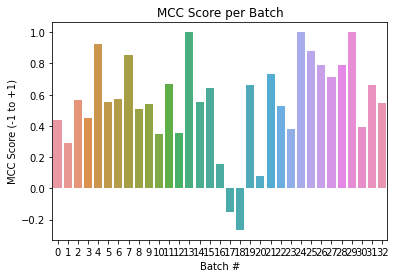

In [45]:
# Create a barplot showing the MCC score for each batch of test samples.
import matplotlib.pyplot as plt
% matplotlib inline

ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [46]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.565


In [ ]:
# todo, chnage best model parameters, for bert best possible systme


In [ ]:
# todo: try this : https://www.tensorflow.org/text/tutorials/bert_glue

### Step4: Choosing the best system and its configuration 

In [37]:
#### Looking at the sizes

In [38]:
!ls -l --block-size=K $COLA_models_folder

total 568853K
-rw------- 1 root root 128871K Oct 31 02:19  AWD_LSTM_model.pkl
-rw------- 1 root root      1K Oct 31 04:17  config.json
-rw------- 1 root root      1K Oct 31 02:34  dummy-most.clf
-rw------- 1 root root      2K Oct 30 03:06 'LogisticRegression_classifier_C=0.5_class_weight=balanced_solver=lbfgs_tf-idf_vectorizer_analyzer=char_ngram_range=(1, 1)_max_df=0.8_min_df=0.01.clf'
-rw------- 1 root root      2K Oct 30 03:07 'LogisticRegression_classifier_C=0.5_class_weight=balanced_solver=lbfgs_tf-idf_vectorizer_analyzer=char_ngram_range=(1, 1)_max_df=0.8_min_df=0.05.clf'
-rw------- 1 root root      2K Oct 30 03:07 'LogisticRegression_classifier_C=0.5_class_weight=balanced_solver=lbfgs_tf-idf_vectorizer_analyzer=char_ngram_range=(1, 1)_max_df=0.9_min_df=0.01.clf'
-rw------- 1 root root      2K Oct 30 03:08 'LogisticRegression_classifier_C=0.5_class_weight=balanced_solver=lbfgs_tf-idf_vectorizer_analyzer=char_ngram_range=(1, 1)_max_df=0.9_min_df=0.05.clf'
-rw------- 1 root root   

In [39]:
!ls -l --block-size=M $COLA_models_folder/pytorch_model.bin

-rw------- 1 root root 418M Oct 31 04:17 Models/CoLA//pytorch_model.bin


### Step5: Neat Analysis of the chosen system ( including creating new data ) 

### Step6: Improving the chosen system (based on the analysis above)

In [ ]:
# todo : save the system

### Step7 : Testing the system on new test data (later)

## Task 2 : MSRPC


### Step1 : Download and get to Know the data

In [75]:
MSRPC_data_folder = 'Data/MSRPC/'
MSRPC_models_folder  = 'Models/MSRPC/'
MSRPC_output_folder = 'Outputs/MSRPC/'

train_MSRPC_file = MSRPC_data_folder +'msr_paraphrase_train.txt'
test_MSRPC_file =MSRPC_data_folder  + 'msr_paraphrase_test.txt'

In [76]:
#train_MSRPC_data =  pd.read_table(train_MSRPC_file, usecols=[1, 2, 3] , names = [ 'Acceptability judgment label' , 'Sentence'])
train_MSRPC_data =  pd.read_csv(train_MSRPC_file, delimiter='\t',  header=0,  usecols=[0,3,4] , names = [ 'Quality Score' , 'Sentence 1', 'Sentence 2'] , error_bad_lines=False)
train_MSRPC_data

,Quality Score,Sentence 1,Sentence 2
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...
3957,1,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull..."
3958,0,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...
3959,1,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p..."
3960,1,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...


In [79]:
print('#todo, why did I find 3962 while it says on the web it should find 5,801 sentences ?? ')

#todo, why did I find 3962 while it says on the web it should find 5,801 sentences ?? 


In [77]:
train_MSRPC_data['Quality Score'].value_counts()

1    2677
0    1285
Name: Quality Score, dtype: int64

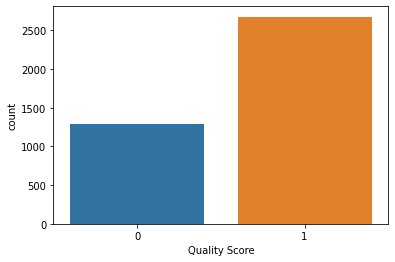

In [78]:
from seaborn import countplot
countplot(x='Quality Score', data = train_MSRPC_data)

### Step 2 : Reasonable Baseline - distance edition 

### Step 3 : Improving the baseline 

### Step 4: Choosing the best system 

### Step 5 : Neat Analysis of the chosen system

### Step 6 : Search for weaknesseness in the system and try to correct them

### Step 7 : Testing the system on new data (later)  

# The end.